# Introducción

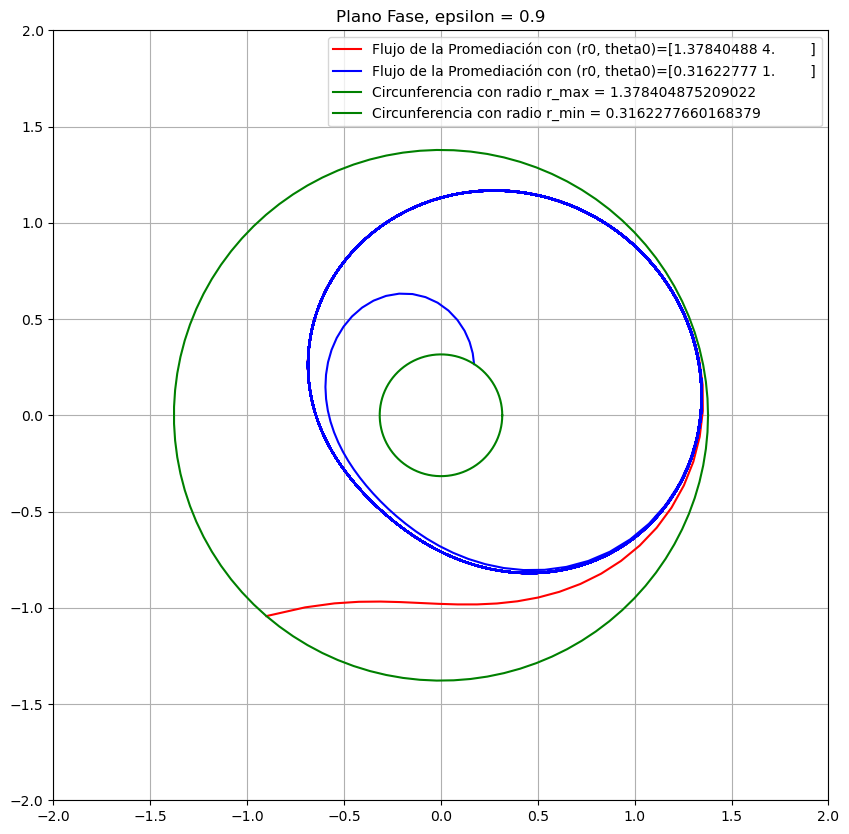

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mu=.9

def polar(z):
    r=z[0]
    theta=z[1]
    dr = r*(1-r**2)+mu*r*np.cos(theta)
    dtheta = 1
    return np.array([dr,dtheta])

#############################

def rk4polar(y0,h,n):
  y=np.zeros((2,n+1))
  y[:,0]=y0
  for k in range(n):
    k1=polar(y[:,k])
    k2=polar(y[:,k]+(h/2)*k1)
    k3=polar(y[:,k]+(h/2)*k2)
    k4=polar(y[:,k]+h*k3)
    y[:,k+1]=y[:,k]+(h/6)*(k1+2*k2+2*k3+k4)
  return y


##############################
r1 = np.sqrt(1+mu)
r2 = np.sqrt(1-mu)
theta = np.linspace(0, 2*np.pi, 100)
c1 = r1 * np.cos(theta)
d1 = r1 * np.sin(theta)
c2 = r2 * np.cos(theta)
d2 = r2 * np.sin(theta)
##############################



############## POLAR ###################

z01=np.array([np.sqrt(1+mu),4])
zz1=rk4polar(z01,0.1,5000)
r1=zz1[0,:]
theta1=zz1[1,:]

z02=np.array([np.sqrt(1-mu),1])
zz2=rk4polar(z02,0.1,5000)
r2=zz2[0,:]
theta2=zz2[1,:]

##############################
L =2
fig, ax = plt.subplots(figsize = (10,10))
#q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
#ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'Plano Fase, epsilon = {mu}')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
#ax.scatter(X, Y, color='0.5', s=1)
#plt.plot(x1, y1, label=f'Flujo de la EDO con X(0)={y01}', color='red')
#plt.plot(x2, y2, label=f'Flujo de la EDO con X(0)={y02}', color='blue')
plt.plot(r1*np.cos(theta1),r1*np.sin(theta1) , label=f'Flujo de la Promediación con (r0, theta0)={z01}', color='red')
plt.plot(r2*np.cos(theta2),r2*np.sin(theta2) , label=f'Flujo de la Promediación con (r0, theta0)={z02}', color='blue')

####
plt.plot(c1, d1, color='green',label=f'Circunferencia con radio r_max = {np.sqrt(1+mu)}')
plt.plot(c2, d2, color='green',label=f'Circunferencia con radio r_min = {np.sqrt(1-mu)}')
##

plt.legend()
plt.grid(True)
plt.show()